# НИР Лабораторная работа № 3

## Постановка задачи

- Найти преобразование Гильберта для сигнала $f(t)$ динамической системы из [лабораторной работы №1](https://github.com/AlexeyMakurin/Computer-technologies-in-physics/blob/main/RW_laboratory_work_1.ipynb);
- Визуализировать исходный сигнал и временную зависимоть мгновенной амплитуды колебания;
- Построить график мгновенной фазы колебаний. При наличии выреженного линейного тренда, также построить график мгновенной фазы колебаний с вычетом линейного вклада.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

## Преобразование Гильберта

Для негармонической функции $f(t)$ сигнала можно ввести понятие мгновенной амплитуды $a(t)$, фазы $\varphi(t)$ и частоты $\omega(t)$.

И если перейти к комплексной форме записи сигнала

$$z(t) = f(t) + i\hat{f}(t) = a(t) e^{i\varphi(t)}, $$

то есть дополнить реальное колебание $f(t)$ произвольной мнимой частью $\hat{f}(t)$, тогда мгновенные амплитуда, фаза и частота определяются следующим образом

$$ a(t) = \sqrt{f^{2}(t) + \hat{f}^2(t)}, $$

$$ \varphi(t) = \arcsin \dfrac{\hat{f}}{a(t)}, $$

$$ \omega(t) = \dfrac{\dot{\hat{f}}(t) f(t) - \dot{f}(t) \hat{f}(t) }{a^2(t)}. $$

In [3]:
def amplitude(signal, gilbert):
    return np.sqrt(signal**2 + gilbert**2)

In [58]:
def phase(amplitude, gilbert):
    return np.arcsin(gilbert / amplitude)

Преобразование Гильберта для функции сигнала $f(t)$ определяется следующим образом

$$\hat{f}(t) = \dfrac{1}{\pi} \int\limits_{-\infty}^{\infty} \dfrac{f(\tau)}{t - \tau} d\tau.$$

Нахождение преобразования Гильберта через быстрое Фурье преобразование:

- По временому ряду $x(n) = x(n  \Delta t)$, $n = 1,...,N$ вычислить $X(f_k)$ c помощью процедуры БПФ;

- Вычислить Фурье-образ аналитического сигнала по формуле 

$$Z(f) = X(f) + i\hat{X}(f) = 
    \begin{cases}
     2X(f) ,f > 0,\\ 
     0 ,~~~~~~~~f < 0,\\
     X(0),~~f=0.
    \end{cases}$$
    
- Вычислить обратное БПФ от $Z(f_k)$, получив в результате аналитический сигнал $z(n)$;

- Выделить мнимую часть аналитического сигнала $z(n)$, которая является искомым преобразованием Гильберта: $\hat{x}(n) = Im[z(n)]$.

## Динамический сигнал

Рассмотрим динамический сигнал **мембранного потенциала** (для случая белого шума) из [лабораторной работы №1](https://github.com/AlexeyMakurin/Computer-technologies-in-physics/blob/main/RW_laboratory_work_1.ipynb) на временном интервале от $[0, 200]$ с шагом по времени $h = 0.01$.

Значения сигнала взяты из заранее подготовленного файла.

In [53]:
df_morris_lecar = pd.read_csv("morris-lecar.csv")
df_morris_lecar

,Unnamed: 0,time,membrane potential,recovery variable,external current
0,0,0.00,-52.140000,0.020000,-0.155961
1,1,0.01,-52.139799,0.020005,0.024695
2,2,0.02,-52.139418,0.020010,-0.072668
3,3,0.03,-52.139134,0.020015,-2.471735
4,4,0.04,-52.141238,0.020020,1.449199
...,...,...,...,...,...
19995,19995,199.95,-52.169938,0.030002,0.457681
19996,19996,199.96,-52.169465,0.030002,1.623485
19997,19997,199.97,-52.167832,0.030002,-2.285696
19998,19998,199.98,-52.170089,0.030002,0.418717


In [54]:
times = df_morris_lecar["time"]
membrane_potential = df_morris_lecar["membrane potential"]

In [36]:
def hilbert_from_scratch(u):
    N = len(u)

    U = np.fft.fft(u)
    
    M = N - N//2 - 1
    U[N//2+1:] = [0] * M
    U[1:N//2] = 2 * U[1:N//2]
   
    v = np.fft.ifft(U)
    
    return np.imag(v)

Вычисляем преобразование гильберта, мгновенные амплитуду и фазу дискретного сигнала динамической системы.

In [59]:
gilbert = hilbert_from_scratch(membrane_potential)

a = amplitude(membrane_potential, gilbert)

phi = phase(a, gilbert)

Построим графики исходного сигнала и мгновенной амплитуды 

<IPython.core.display.Javascript object>


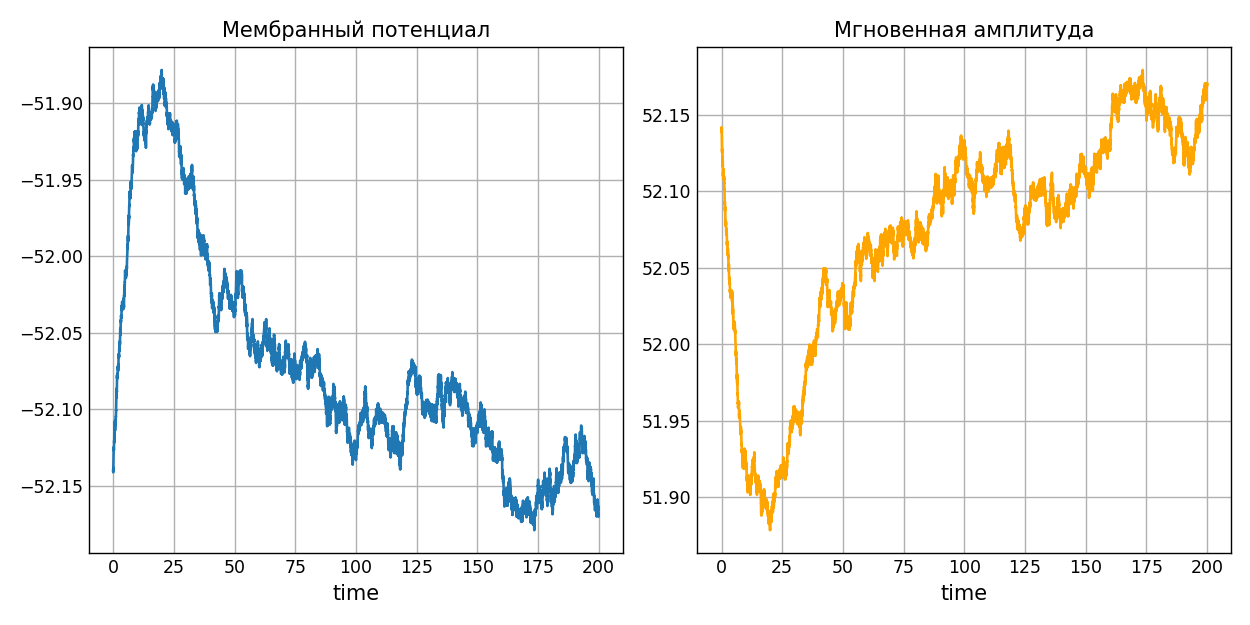

In [60]:
plt.style.use('_mpl-gallery')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title('Мембранный потенциал')
axs[1].set_title('Мгновенная амплитуда')

axs[0].plot(times, membrane_potential)
axs[1].plot(times, np.abs(amplitudes[0]), c='orange')
       

axs[0].set_xlabel('time', size=12)
axs[1].set_xlabel('time', size=12)

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


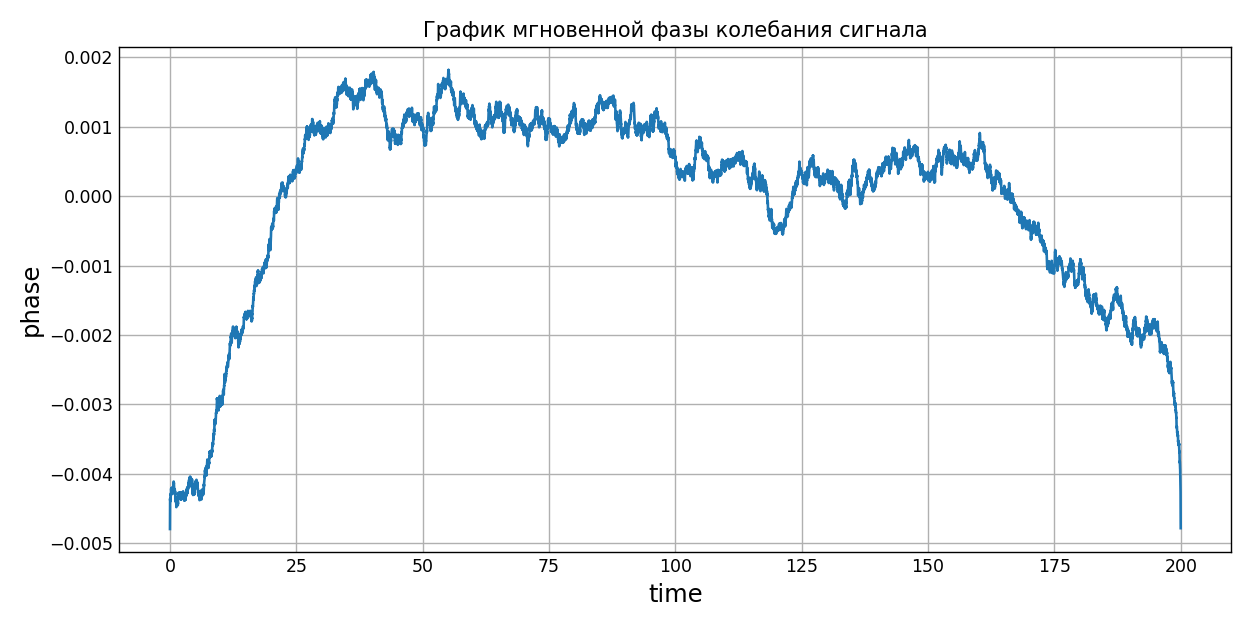

In [74]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(times, phi)
ax.set_title('График мгновенной фазы колебания сигнала')
ax.set_ylabel('phase', size=14)
ax.set_xlabel('time', size=14)

fig.tight_layout()
plt.show()

Полученый график мгновенной фазы колебания не имеет явно выраженного линейного тренда.